# Customer Segmentation using K-Means Clustering (CRM) - Group 9

# Project Objectives

***Enterprise System*** <br>
**Denise Sonia Rahmadina - 05111640000177** <br>
**Daniel Lumbantobing - 05111640000042**

The objectives of the implementation is to segment customers to help CRM department make decision for their marketing strategy. For this project, we're going to be using the Mall_Customers data and use the K-Means & Agglomerative Clustering method. <br>
**Dataset Link** : https://www.kaggle.com/shwetabh123/mall-customers <br>
**Paper Link** : https://ieeexplore.ieee.org/document/8769171

In [62]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff


# EDA (Exploratory Data Analysis)

In [63]:
# importing the dataset
data = pd.read_csv('Mall_Customers.csv')

dat = ff.create_table(data.head())

py.iplot(dat)

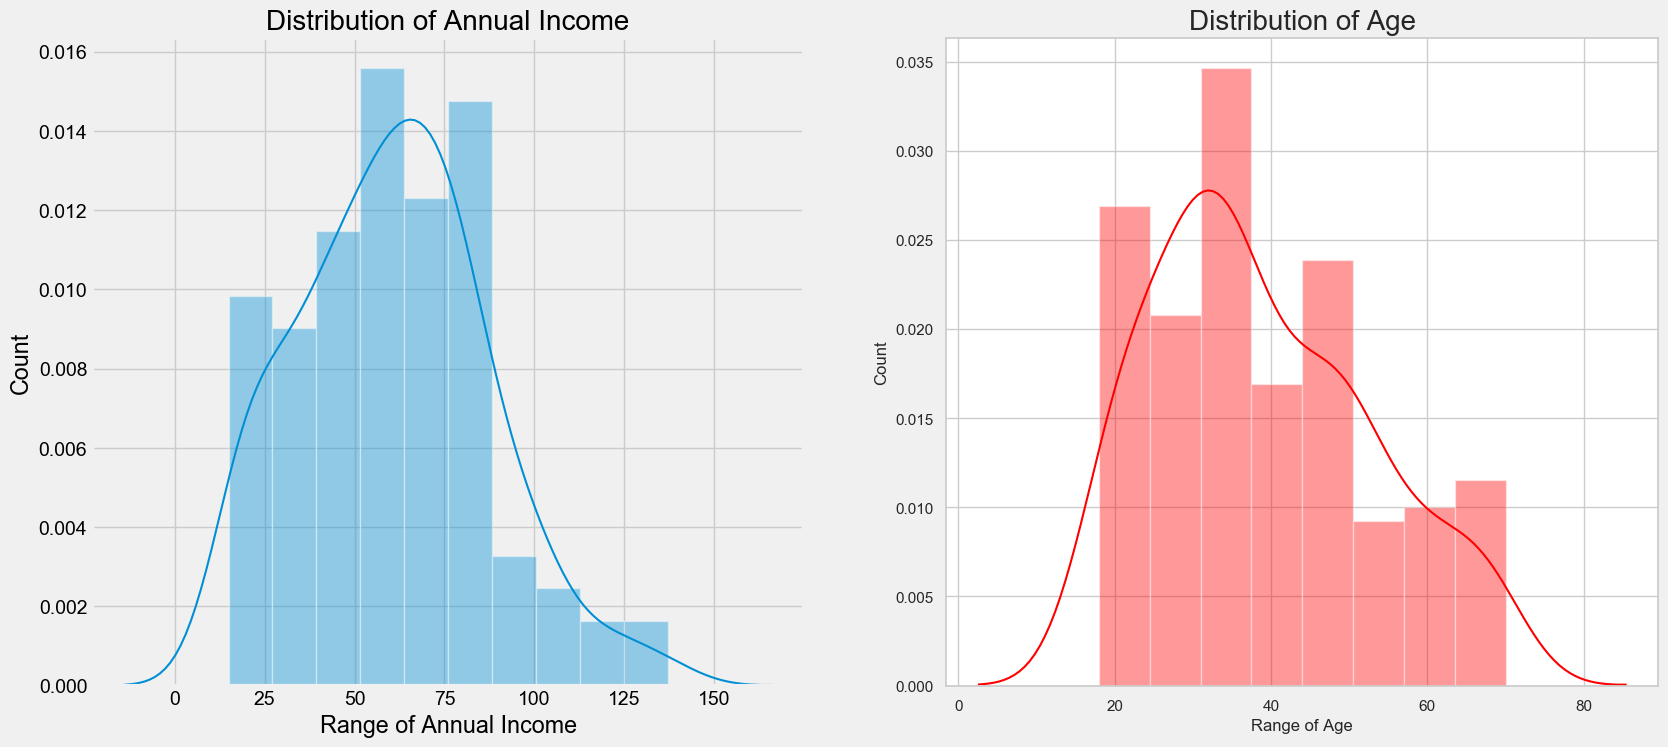

In [64]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

Since the data is already normally distributed, we don't have to scale/normalize it. And this distribution is based on metrics that is not a categorical data

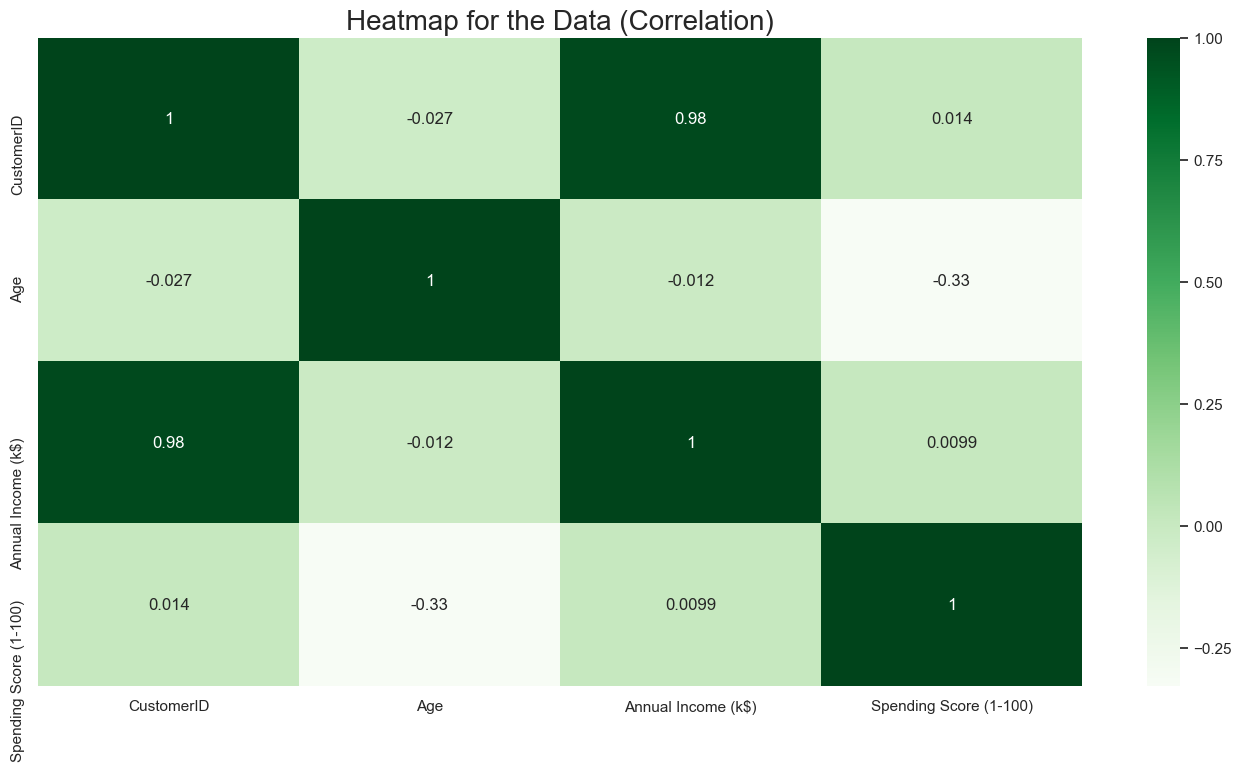

In [65]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data.corr(), cmap = 'Greens', annot = True)
plt.title('Heatmap for the Data (Correlation)', fontsize = 20)
plt.show()

This heatmap is to show the correlation between each features, the higher the correlation the darker it will be for the map. We can clearly see that these attributes do not have good correlation among them, that's why we will proceed with all of the features.

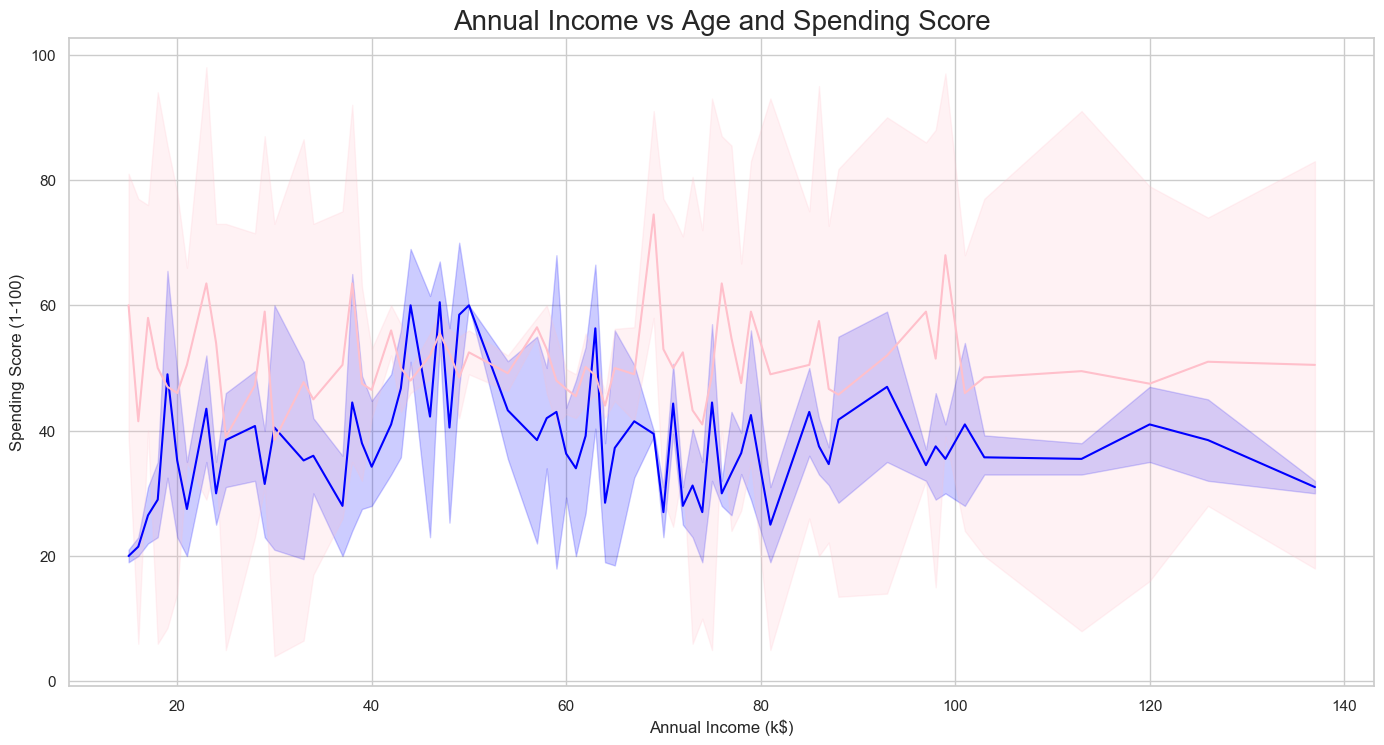

In [66]:
x = data['Annual Income (k$)']
y = data['Age']
z = data['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

The above Plot Between Annual Income and Age represented by a blue color line, and a plot between Annual Income and the Spending Score represented by a pink color. shows how Age and Spending Varies with Annual Income.

# Clustering Analysis 

# K-Means Clustering

**Definition by Paper** : 
It is the simplest algorithm of clustering based on
partitioning principle. The algorithm is sensitive to the
initialization of the centroids position, the number of K
(centroids) is calculated by elbow method (discussed
in later section), after calculation of K centroids by the
terms of Euclidean distance data points are assigned to
the closest centroid forming the cluster, after the
cluster formation the barycentre’s are once again
calculated by the means of the cluster and this process
is repeated until there is no change in centroid
position.[10][11]

# Elbow Method

Before we apply the K-Means Clustering, we have to decide which k (number of clusters) is the most effective through a method called the Elbow Method.

**Definition by Paper** : Elbow method is used for finding optimal value of K
for K-means clustering algorithm. This method works
by finding the SSE of each data point with its nearest
centroid with different values of K. As value of K
increases the SSE will decrease and at a particular
value of K where there is most decline in the SSE is
the elbow, the point at which we should stop dividing
data further.

In [67]:
x = data.iloc[:, [3, 4]].values

# let's check the shape of x
print(x.shape)

(200, 2)


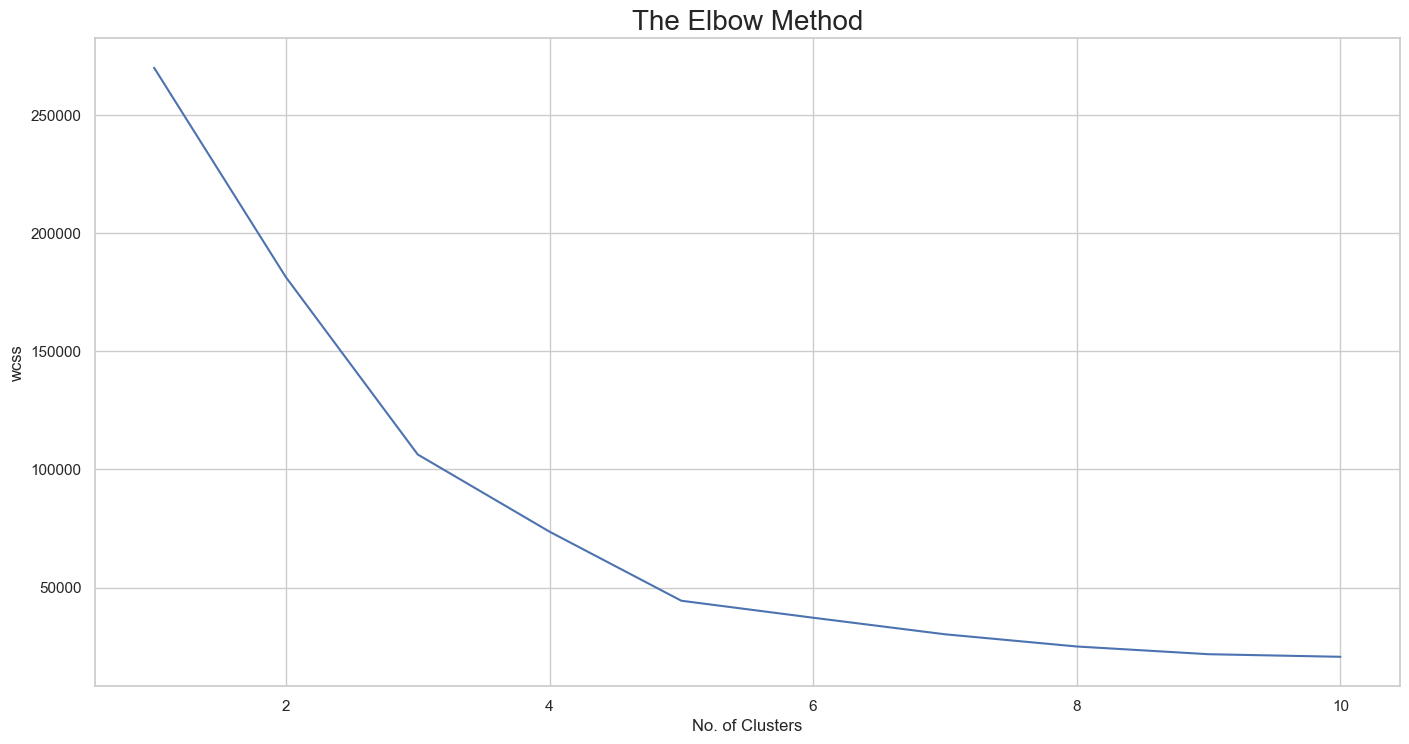

In [68]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

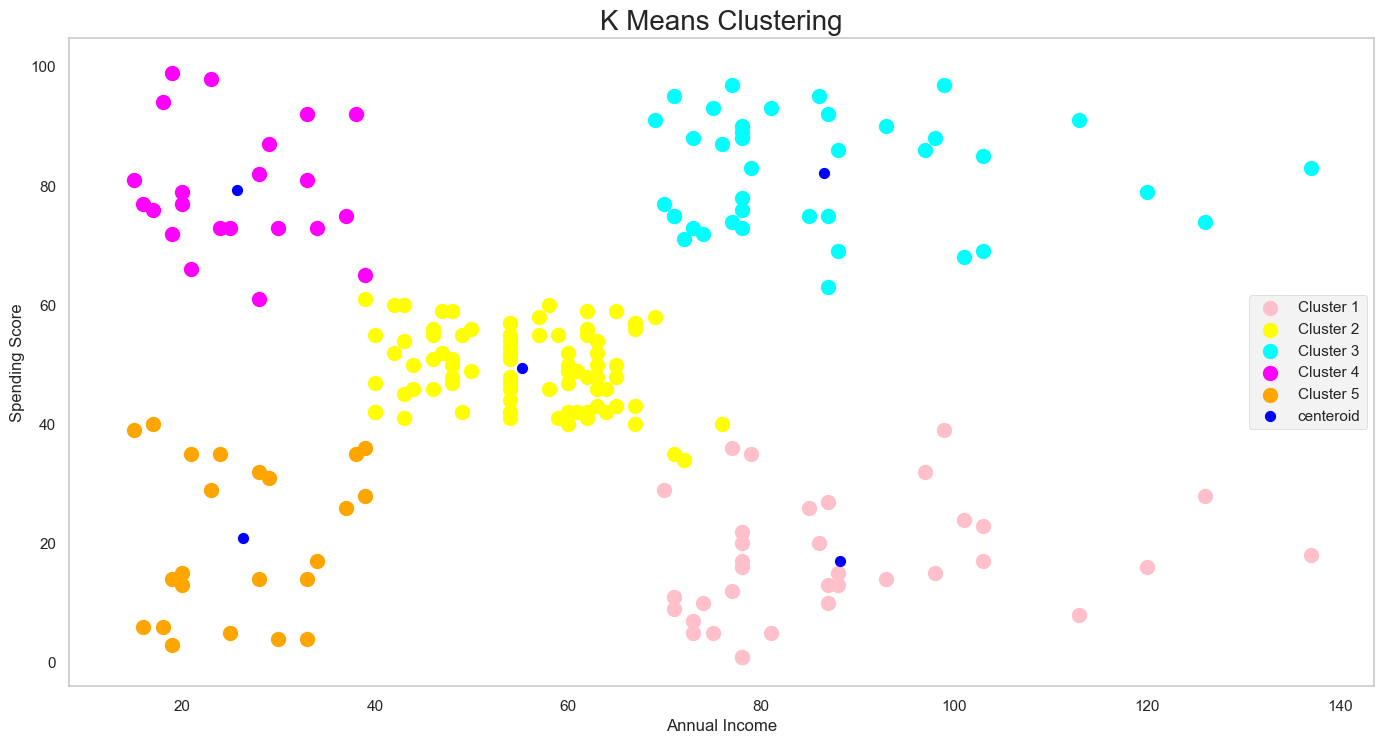

In [69]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Cluster 1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'Cluster 5')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall. There are clearly Five segments of Customers based on their Annual Income and Spending Score which are reportedly the best factors/attributes to determine the segments of a customer in a Mall.

# Silhouette Score

To measure how well our model cluster our data, we use the Silhouette Score. <br>
**First Step** :
a = Average distance between the centroid of a
cluster and the data points embroiled into it. <br>
**Second Step**:
b = Average distance between the data point and the
closest cluster data points. <br>
**Silhouette Score** = b-a/max(b,a)

In [70]:
from sklearn.metrics import silhouette_score
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score1 = silhouette_score(x, y_means, metric='euclidean')
score1

0.553931997444648

# K-Means Clustering by Age & Spending Score

In [71]:
x = data.iloc[:, [2, 4]].values
x.shape

(200, 2)

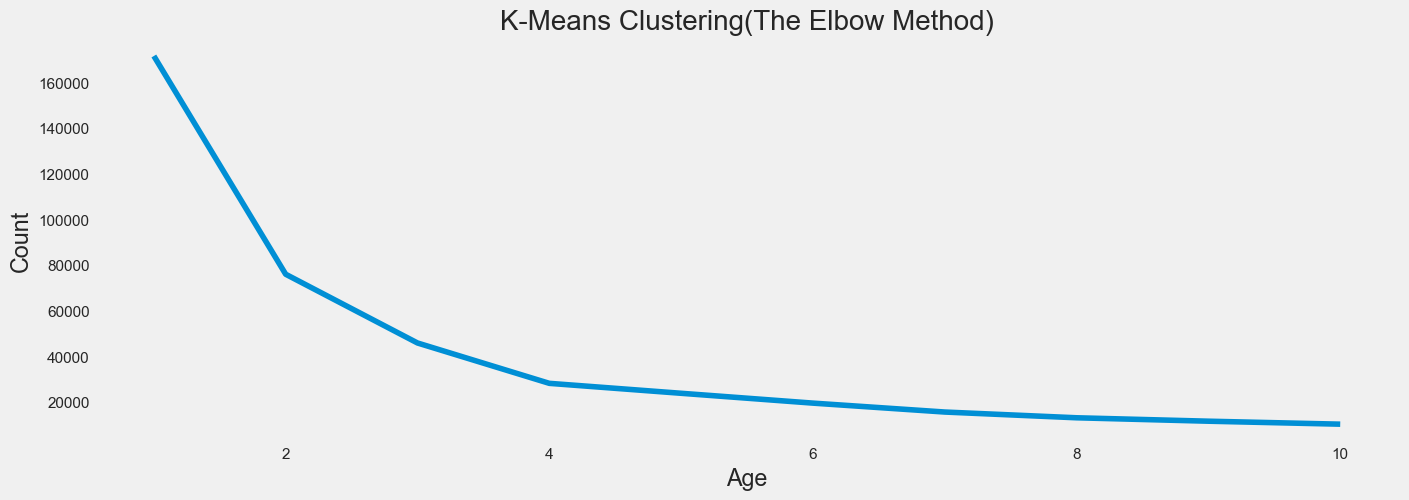

In [72]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

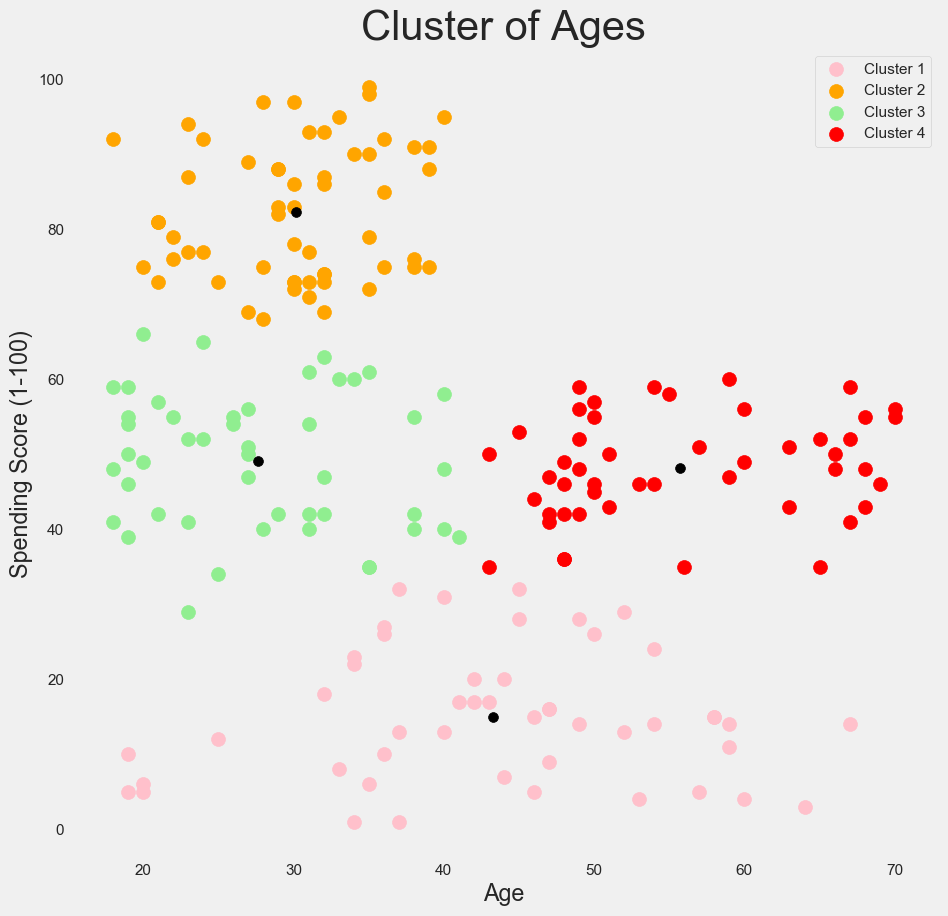

In [73]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Cluster 1' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Cluster 3')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

# Agglomerative Clustering

**Definition by Paper** : This clustering comes under hierarchical clusters
are formed based on some hierarchy. Hierarchical
clustering is It is based on the concept that objects
that are closer are more related to each other in
comparison of the objects that are far from each
other., T.Nelson et al. [3]. The main challenge of
Hierarchical method is that once it undergoes split
or merge operation it can never be undone. This
challenge is profitable as it leads to smaller
computation costs by not worrying about a
combinatorial number of different choices. Yogita
et al. [4]. There are two strategy in hierarchical
clustering, first is top-down strategy also known as
divisive clustering and second is bottom – up
strategy also known as agglomerative clustering.


In [74]:
x = data.iloc[:, [3, 4]].values

# let's check the shape of x
print(x.shape)

(200, 2)


# Dendrogram

Dendrogram is the hierarchical representation of
object, it is used to determine the output of the
hierarchical clustering. The way Dendrogram is
interpreted is by checking the height of each clade
(horizontal line), the lower the height the more
associated data points are and greater the height more
less associated data points.

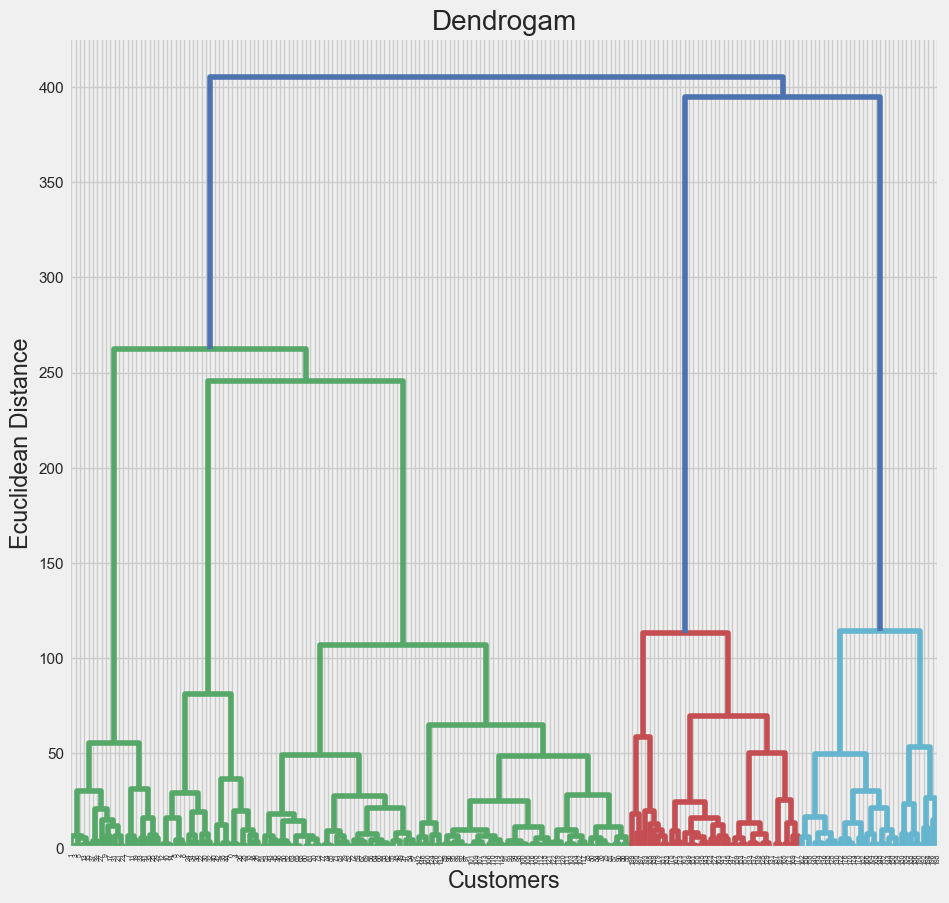

In [75]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

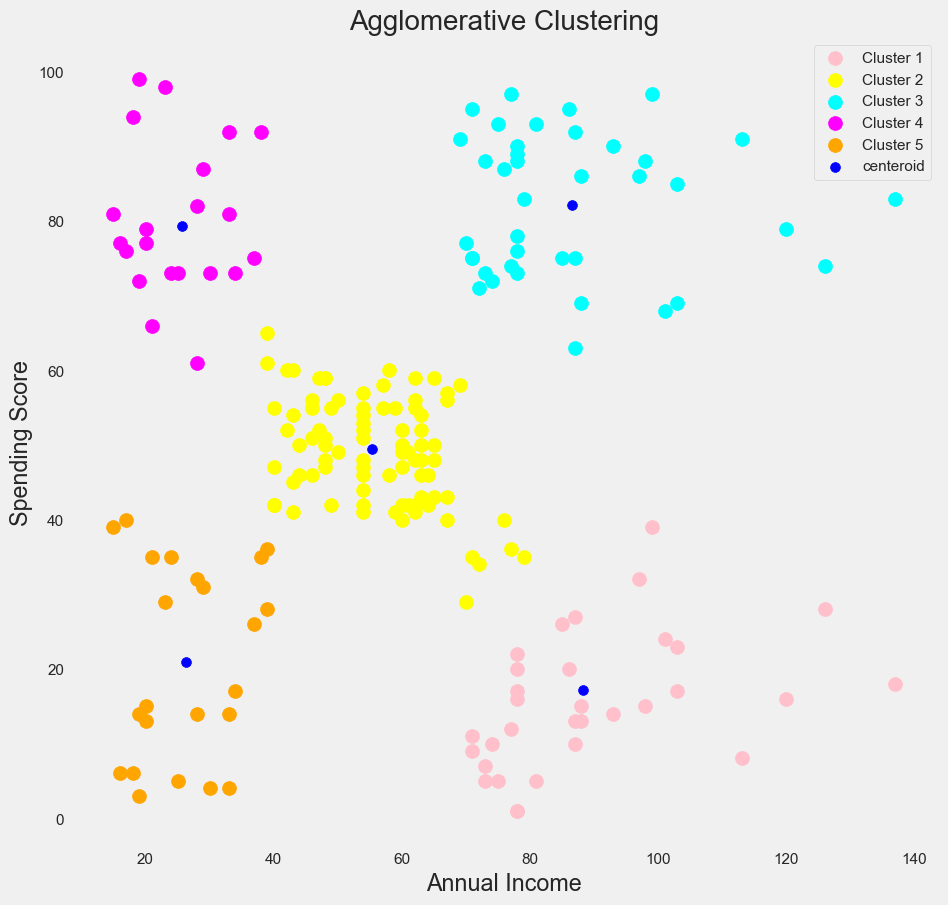

In [76]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'Cluster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'Cluster 5')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Agglomerative Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [77]:
from sklearn.metrics import silhouette_score
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score2 = silhouette_score(x, y_hc, metric='euclidean')
score2

0.5529945955148897

# Agglomerative Clustering by Age & Spending Score

In [78]:
x = data.iloc[:, [2, 4]].values
x.shape

(200, 2)

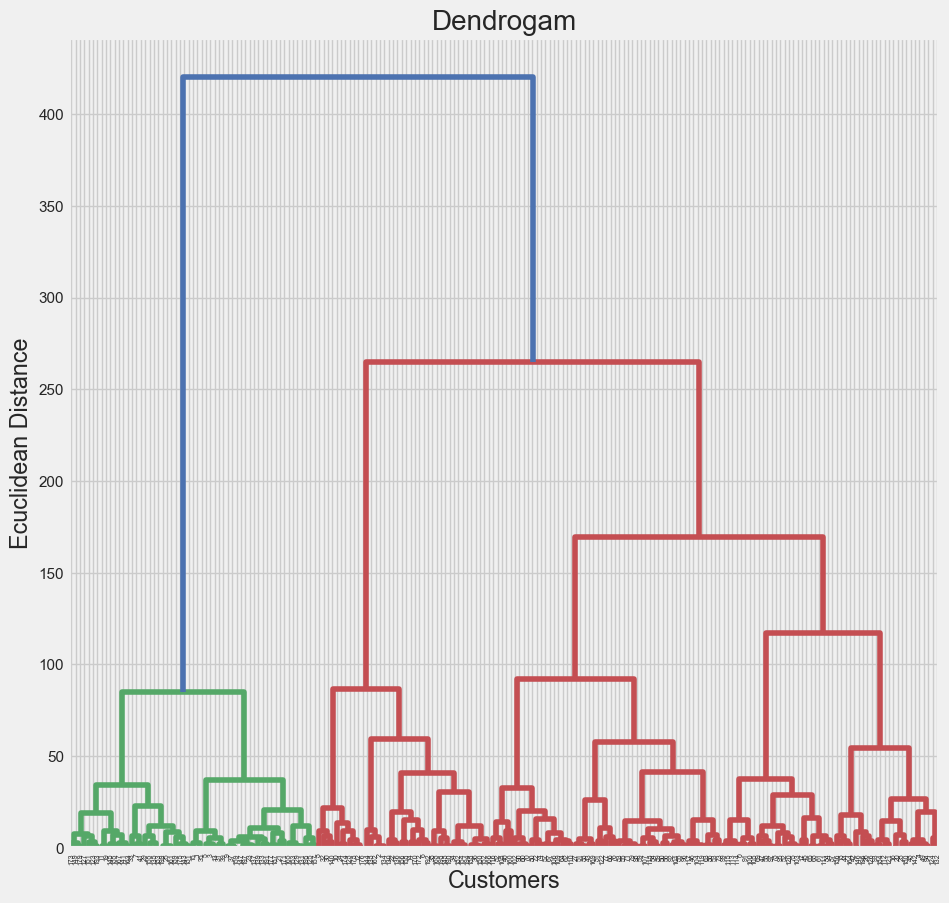

In [79]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

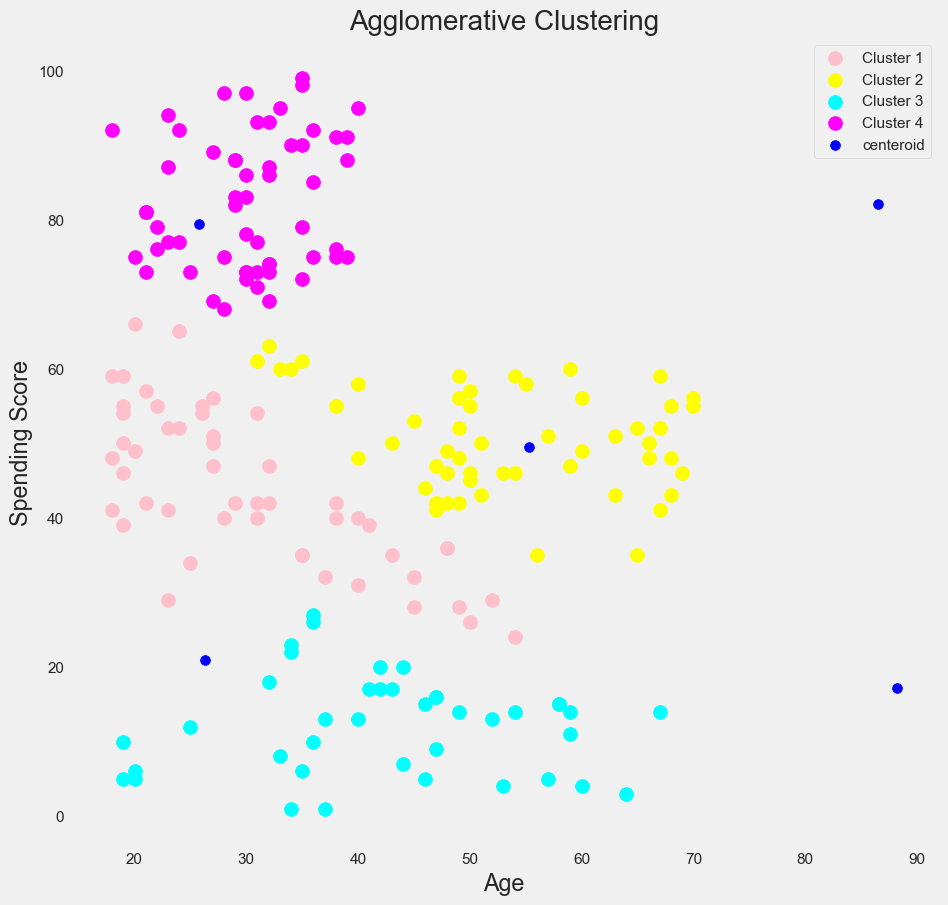

In [80]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'Cluster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Agglomerative Clustering', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [81]:
from sklearn.metrics import silhouette_score
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(x, y_means, metric='euclidean')
score

0.1632888738101461

# Mean Shift 

**Definition by Paper** : This non-parametric clustering method is being applied to see some different pattern in a dataset as K-means and Agglomerative gave almost the same result. This algorithm follows an iterative approach where a point of local maxima is found around each data point defined by probability density function, and iterates until when all the data point converges up the hill (created by PDF), also known as ‘hill climbing algorithm’.


In [82]:
x = data.iloc[:, [3, 4]].values

# let's check the shape of x
print(x.shape)

(200, 2)


In [83]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans,MeanShift,estimate_bandwidth
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [84]:
features = ['Annual Income (k$)','Spending Score (1-100)']
X = data[features]

bandwidth = estimate_bandwidth(X,quantile=0.20)
meanshift = MeanShift(bandwidth=bandwidth,bin_seeding=True)
meanshift.fit(X)

labels = meanshift.labels_

X['labels'] = labels

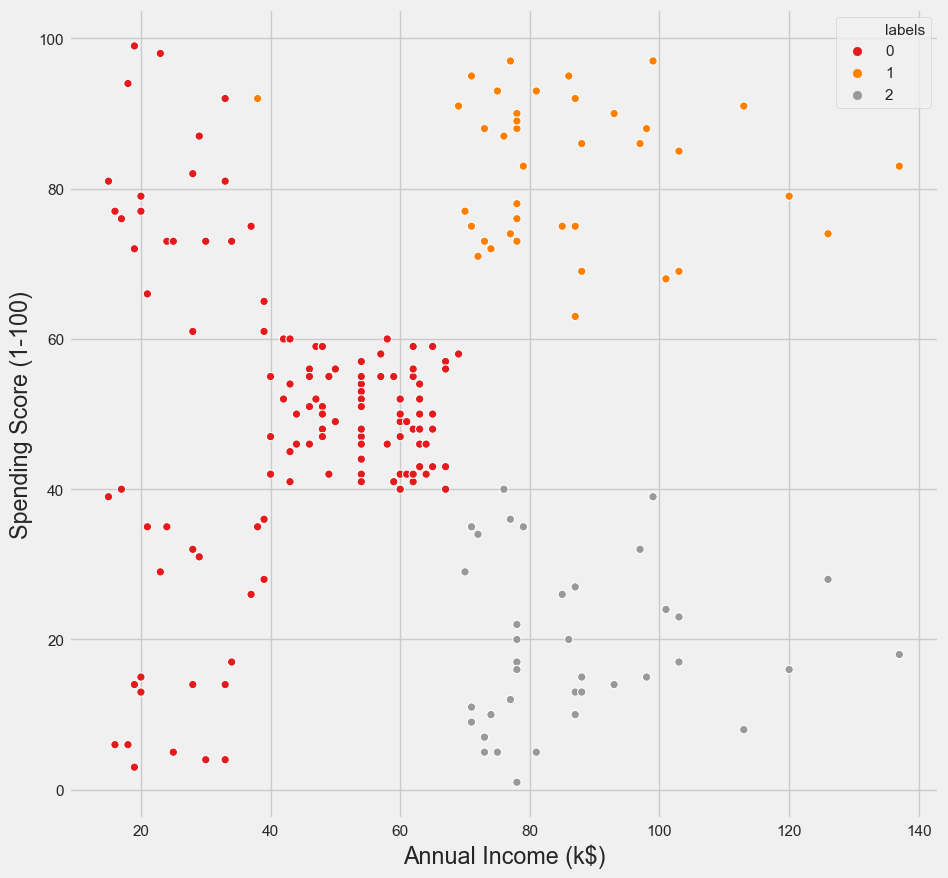

In [85]:
sb.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data = X,hue='labels',palette="Set1",legend="full")


In [86]:
from sklearn.metrics import silhouette_score
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score3 = silhouette_score(x, y, metric='euclidean')
score3

-0.6078019682903125

# Mean Shift Clustering by Age & Spending Score

In [87]:
features = ['Age','Spending Score (1-100)']
X = data[features]

bandwidth = estimate_bandwidth(X,quantile=0.20)
meanshift = MeanShift(bandwidth=bandwidth,bin_seeding=True)
meanshift.fit(X)

labels = meanshift.labels_

X['labels'] = labels

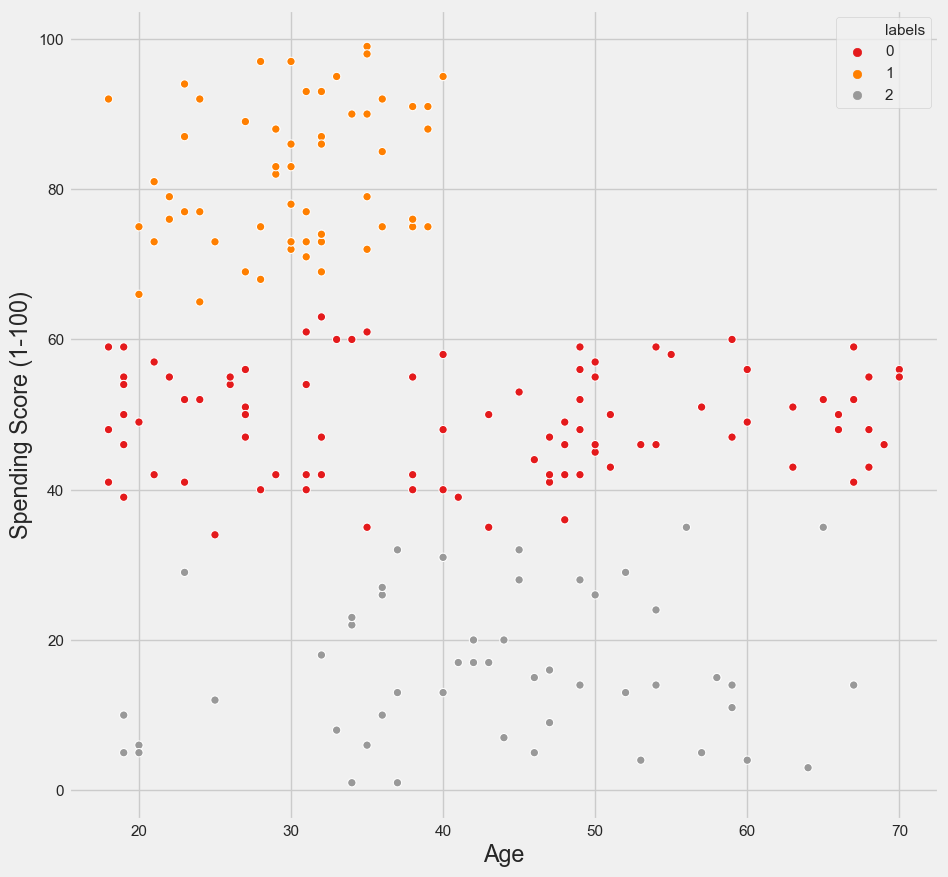

In [88]:
sb.scatterplot(x='Age',y='Spending Score (1-100)',data = X,hue='labels',palette="Set1",legend="full")


# Conclusion

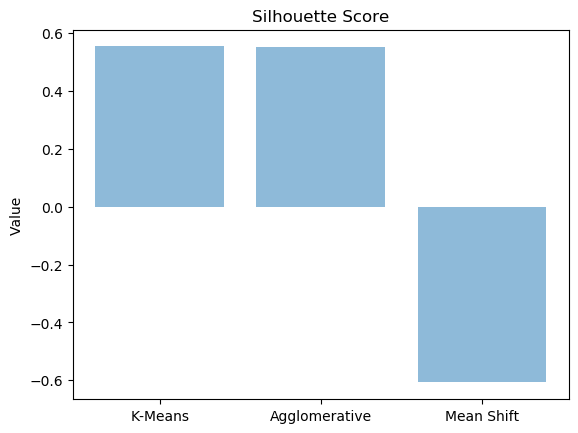

In [89]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('K-Means', 'Agglomerative','Mean Shift')
y_pos = np.arange(len(objects))
performance = [score1,score2,score3]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Value')
plt.title('Silhouette Score')

plt.show()

Figure above displays the silhouette score for the three
algorithms applied in this paper, the graph shows there
is not much significant difference in K-means and
Agglomerative clustering. Hence, these two algorithms
were able to cluster our data well. Meanwhile, the mean shift method has a negative value of the Silhouette Score, so this method is not effective to cluster our data.

# Cluster using All Metrics

Add Metrics : <br>
    # of visits to the shop <br>
    # of orders 

In [90]:
# importing the dataset
data = pd.read_csv('Mall_Customers2.csv')

dat = ff.create_table(data.head())

py.iplot(dat)

In [91]:
x = data.iloc[:, [5, 6]].values

# let's check the shape of x
print(x.shape)

(200, 2)


# K-Means

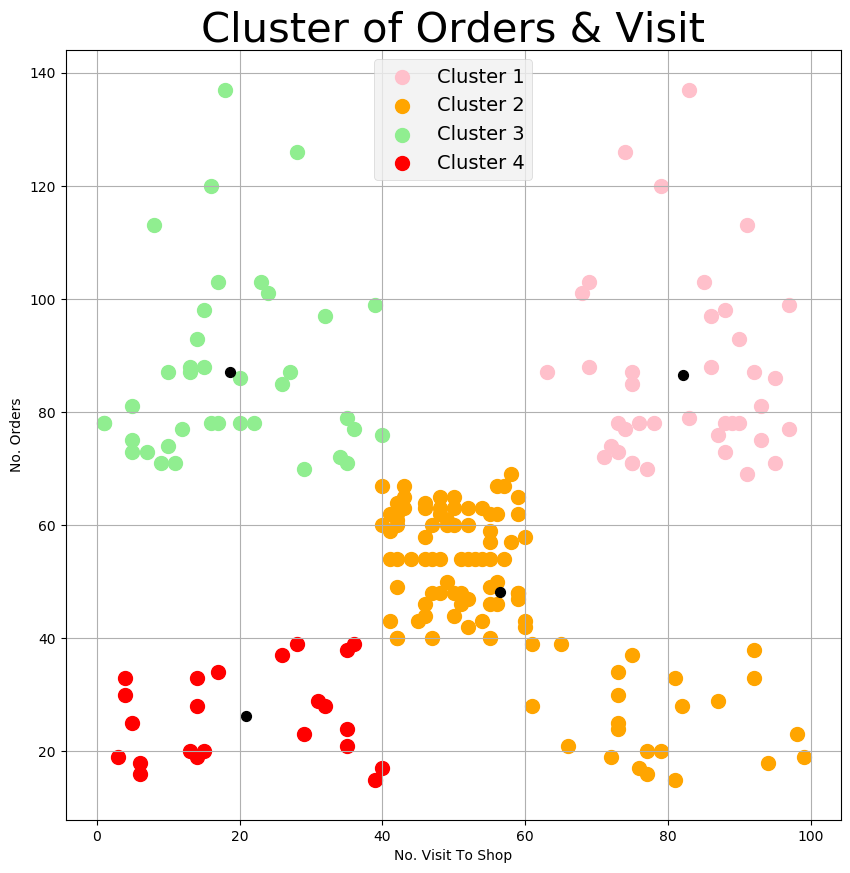

In [92]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Orders & Visit', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Cluster 1' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Cluster 3')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('No. Visit To Shop')
plt.ylabel('No. Orders')
plt.legend()
plt.grid()
plt.show()

# Agglomerative

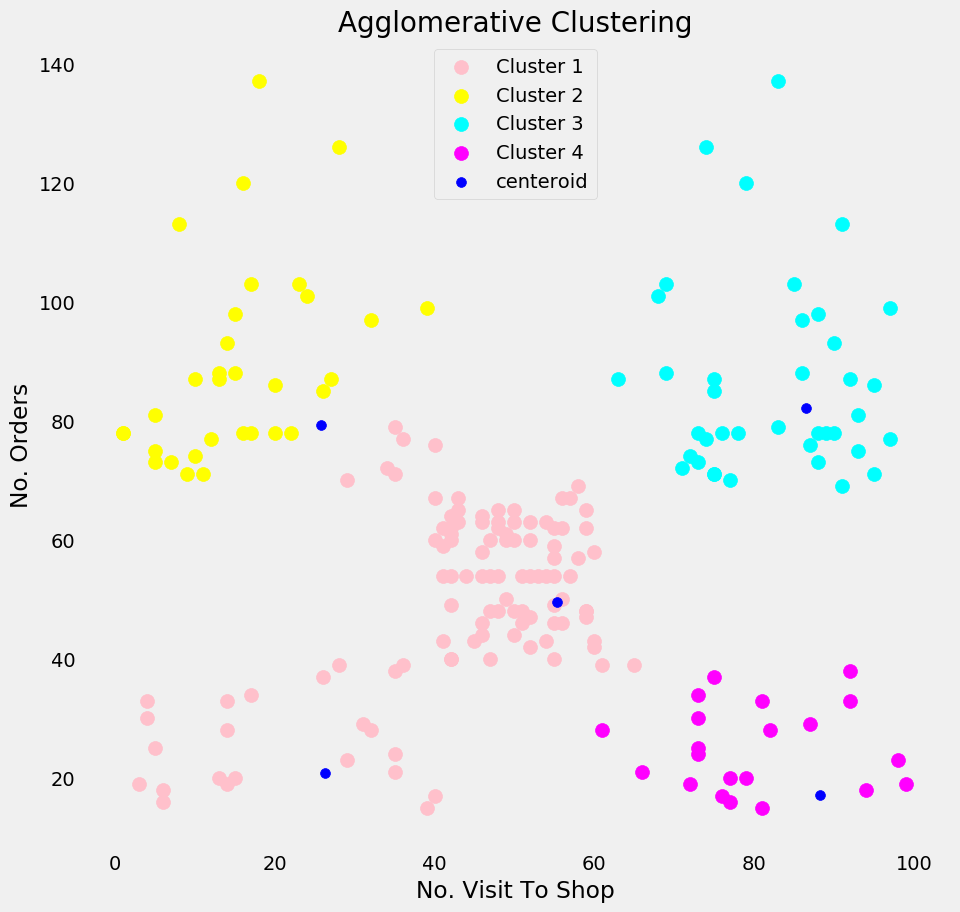

In [93]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'Cluster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Agglomerative Clustering', fontsize = 20)
plt.xlabel('No. Visit To Shop')
plt.ylabel('No. Orders')
plt.legend()
plt.grid()
plt.show()

In [94]:
from sklearn.cluster import KMeans
x = data[['Age', 'no_visit', 'no_orders']].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x)
labels = km.labels_
centroids = km.cluster_centers_

In [95]:
data['labels'] =  labels
trace1 = go.Scatter3d(
    x= data['Age'],
    y= data['no_visit'],
    z= data['no_orders'],
    mode='markers',
     marker=dict(
        color = data['labels'], 
        size= 10,
        line=dict(
            color= data['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'Age vs No. Orders vs. No. Visit',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = '# Visit'),
            zaxis = dict(title  = '# Orders')
        )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

So, can wee that there are 5 clusters using 3 metrics. After this, we can make the Persona and recommended treatment of each cluster and give it to the CRM Department.

We want to improve our business by using one of the segmentation made above, we use the one with the orange colour with high #Orders but low on #Visit

In [100]:
df = pd.DataFrame(data['no_orders'], data['no_visit'])

In [101]:
df.head()

,no_orders
no_visit,
39,37
81,54
6,18
77,54
40,38


In [102]:
orders = data['no_orders'] > 60

In [103]:
visits = data['no_visit'] > 40

In [104]:
df[orders & visits]

,no_orders
no_visit,
99,61
98,61


In [105]:
df['order_ranked']=df['no_orders'].rank(ascending=0,method='min')
df

,no_orders,order_ranked
no_visit,,
39,37,142.0
81,54,25.0
6,18,189.0
77,54,25.0
40,38,134.0
76,54,25.0
6,18,189.0
94,60,3.0
3,16,198.0


In [106]:
 df.sort_values(by=['order_ranked'])

,no_orders,order_ranked
no_visit,,
99,61,1.0
98,61,1.0
92,60,3.0
95,60,3.0
93,60,3.0
97,60,3.0
93,60,3.0
92,60,3.0
94,60,3.0
